In [1]:
import math
import torch
import numpy as np
import gpytorch
import pandas as pd
import seaborn as sns
import os
import pickle
import matplotlib 
matplotlib.use('Agg')
from matplotlib import pyplot as plt
import sklearn
from sklearn.model_selection import KFold

%matplotlib inline
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import imblearn as imb
# print("imblearn version: ",imblearn.__version__)
from imblearn.over_sampling import SMOTE

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
import itertools

from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, auc, recall_score

from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

import sys
sys.path.append('../../')

from sklearn.model_selection import GridSearchCV
from VisUtils import *
from split_data import *
from RF_GSCV import *


# Load binding data 

In [2]:
split_path = '../../../../../data/NEK_data_4Berkeley/NEK2/'
# train_x_df = pd.read_csv(split_path+"/NEK2_binding_random_fold1_trainX.csv")
# train_y_df= pd.read_csv(split_path+"/NEK2_binding_random_fold1_trainY.csv")
# test_x_df= pd.read_csv(split_path+"/NEK2_binding_random_fold1_testX.csv")
# test_y_df= pd.read_csv(split_path+"/NEK2_binding_random_fold1_testY.csv")
# train_x = torch.from_numpy(train_x_df.to_numpy())
# train_y = torch.from_numpy(train_y_df.to_numpy().reshape(-1))
# test_x = torch.from_numpy(test_x_df.to_numpy())
# test_y = torch.from_numpy(test_y_df.to_numpy().reshape(-1))


# Undersample 

In [3]:
# # Scale data
# x_df = pd.concat([train_x_df, test_x_df])

# scaling=StandardScaler()
 
# # Use fit and transform method 
# scaling.fit(x_df)
# Scaled_data=scaling.transform(x_df)
# train_x = scaling.transform(train_x_df)
# test_x = scaling.transform(test_x_df) 

# undersample = RandomUnderSampler()
# train_x_temp, train_y_temp = undersample.fit_resample(train_x, train_y_df)
# train_x = train_x_temp
# train_y = train_y_temp.to_numpy().flatten()
# test_y = test_y_df.to_numpy().flatten()


In [8]:
# # back to df for saving 
# train_x_df = pd.DataFrame(train_x) 
# train_y_df = pd.DataFrame(train_y) 
# test_y_df = pd.DataFrame(test_y)
# test_x_df = pd.DataFrame(test_x)

# train_x_df.to_csv(split_path+'bind_train_x_UNDER.csv', index=False, header=False)
# train_y_df.to_csv(split_path+'bind_train_y_UNDER.csv', index=False, header=False) 
# test_y_df.to_csv(split_path+'bind_test_y_UNDER.csv', index=False, header=False) 
# test_x_df.to_csv(split_path+'bind_test_x_UNDER.csv', index=False, header=False)
new_df_path = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/NEK2/bind/'
train_x_df = pd.read_csv(new_df_path+'NEK2_binding_moe_UNDER_trainX.csv')
train_y_df= pd.read_csv(new_df_path+'NEK2_binding_moe_UNDER_train_y.csv')
test_x_df= pd.read_csv(new_df_path+'NEK2_binding_moe_UNDER_testX.csv')
test_y_df= pd.read_csv(new_df_path+'NEK2_binding_moe_UNDER_test_y.csv')

train_x = train_x_df.to_numpy()
train_y = train_y_df.to_numpy().reshape(-1)
test_x = test_x_df.to_numpy()
test_y = test_y_df.to_numpy().reshape(-1)
train_x.shape, train_y.shape, test_x.shape, test_y.shape



((90, 306), (90,), (283, 306), (283,))

TRAIN: accuracy: 1.000, precision: 1.000, recall: 1.000, specificity: 1.000
TEST: accuracy: 0.562, precision: 0.069, recall: 0.750, specificity: 0.554


<Figure size 600x400 with 0 Axes>

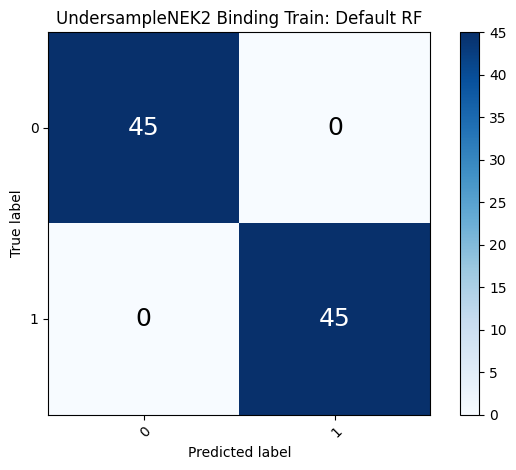

<Figure size 600x400 with 0 Axes>

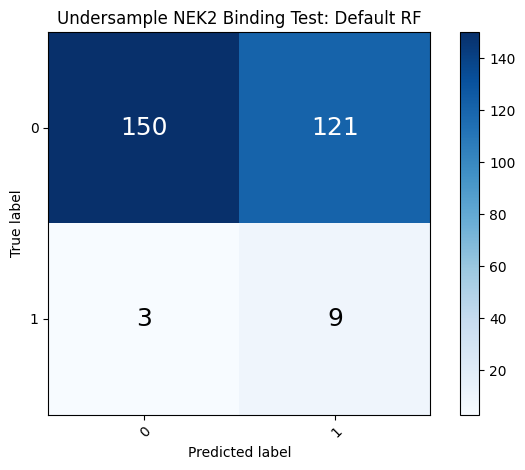

In [9]:
rf_basic100estUNDER = rf_models(train_x, train_y, test_x, test_y, 'basic RF', {})
plot_confusion_matrix(train_y, rf_basic100estUNDER['train_pred'], ['0','1'], title='UndersampleNEK2 Binding Train: Default RF')
plot_confusion_matrix(test_y, rf_basic100estUNDER['test_pred'], ['0','1'], title='Undersample NEK2 Binding Test: Default RF')

In [10]:
param_grid = {
    'n_estimators': np.linspace(100, 2000, 3, dtype = int),
    'max_depth': [20, 100, 200, 220],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [2, 5],
    'criterion': ['gini','entropy']
}

In [9]:
# save_file = 'atom_nek2bindUNDER_rf_basic_best.pkl'
# rf_basicbestUNDER = find_best_models(train_x, train_y, test_x, test_y, 'basic RF', {}, param_grid, 2)

TRAIN: accuracy: 0.822, precision: 0.746, recall: 0.978,  specificity: 0.667
TEST: accuracy: 0.657, precision: 0.079, recall: 0.667, specificity: 0.657


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.4.0 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.4.0 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


<Figure size 600x400 with 0 Axes>

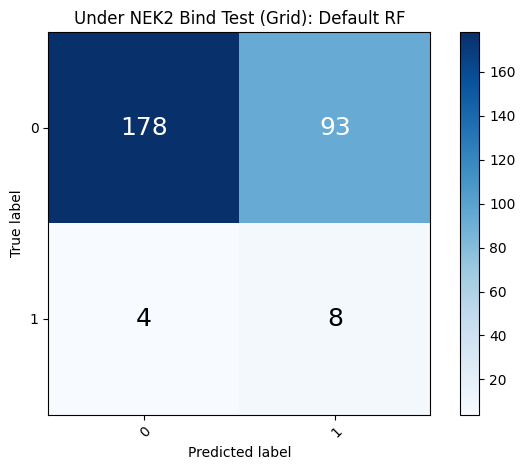

In [11]:
# with open(save_file, 'wb') as f:
#     pickle.dump(rf_basicbestUNDER['best_model'], f)

save_file = 'atom_nek2bindUNDER_rf_basic_best.pkl'
with open('../saved_models/'+save_file, 'rb') as f: 
    rf_basicbestUNDER = pickle.load(f) 
gridresults1 = rf_results2(rf_basicbestUNDER, train_x, train_y, test_x, test_y)
plot_confusion_matrix(test_y, gridresults1['test_pred'], ['0','1'], title='Under NEK2 Bind Test (Grid): Default RF')

# Basic RF + classweight balanced 

TRAIN: accuracy: 1.000, precision: 1.000, recall: 1.000, specificity: 1.000
TEST: accuracy: 0.638, precision: 0.091, recall: 0.833, specificity: 0.630


<Figure size 600x400 with 0 Axes>

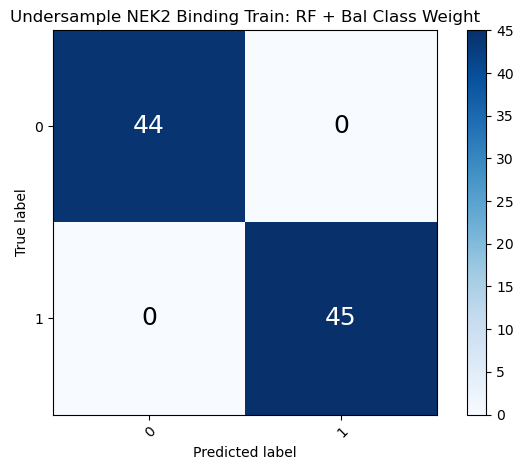

<Figure size 600x400 with 0 Axes>

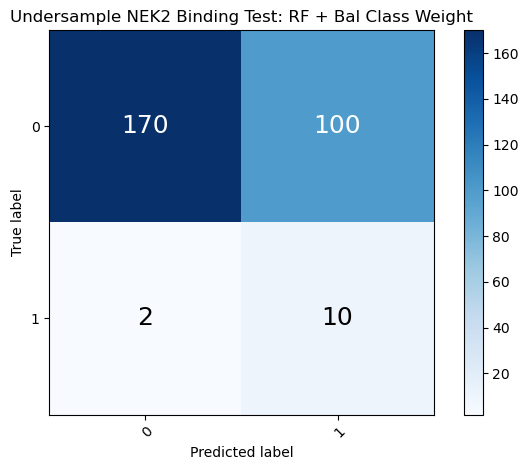

In [11]:
brf_model_BCW_UNDER = rf_models(train_x, train_y, test_x, test_y, 'balanced class_weight', {})
plot_confusion_matrix(train_y, brf_model_BCW_UNDER['train_pred'], ['0','1'], title='Undersample NEK2 Binding Train: RF + Bal Class Weight')
plot_confusion_matrix(test_y, brf_model_BCW_UNDER['test_pred'], ['0','1'], title='Undersample NEK2 Binding Test: RF + Bal Class Weight')

In [12]:
# save_file2 = 'atom_nek2bindUNDER_rf_basicBCW_best.pkl'
# rf_basicBCWbestUNDER = find_best_models(train_x, train_y, test_x, test_y, 'balanced class_weight', {}, param_grid, 2)

# with open(save_file2, 'wb') as f:
#     pickle.dump(rf_basicBCWbestUNDER['best_model'], f)



TRAIN: accuracy: 0.833, precision: 0.759, recall: 0.978,  specificity: 0.689
TEST: accuracy: 0.643, precision: 0.076, recall: 0.667, specificity: 0.642


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.4.0 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.4.0 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


<Figure size 600x400 with 0 Axes>

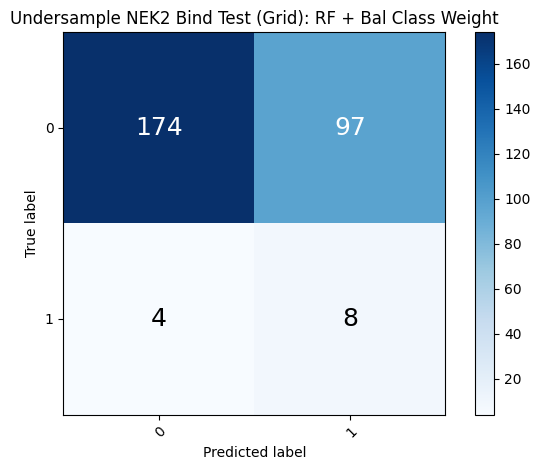

In [12]:
save_file2 = 'atom_nek2bindUNDER_rf_basicBCW_best.pkl'
with open('../saved_models/'+save_file2, 'rb') as f: 
    rf_basicBCWbestUNDER = pickle.load(f) 

gridresults2 = rf_results2(rf_basicBCWbestUNDER, train_x, train_y, test_x, test_y)
plot_confusion_matrix(test_y, gridresults2['test_pred'], ['0','1'], title='Undersample NEK2 Bind Test (Grid): RF + Bal Class Weight')

# Balanced Random Forest Classifier

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:576: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:588: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: accuracy: 1.000, precision: 1.000, recall: 1.000, specificity: 1.000
TEST: accuracy: 0.643, precision: 0.059, recall: 0.500, specificity: 0.649


<Figure size 600x400 with 0 Axes>

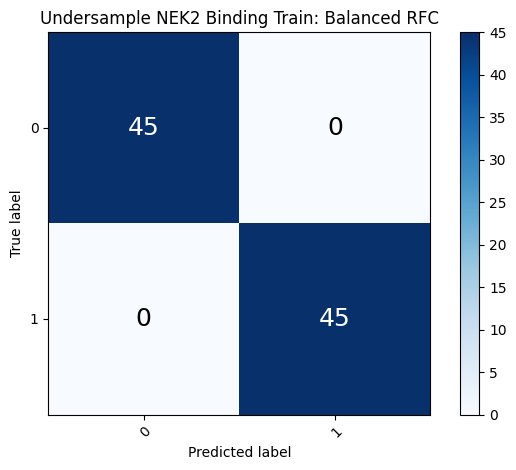

<Figure size 600x400 with 0 Axes>

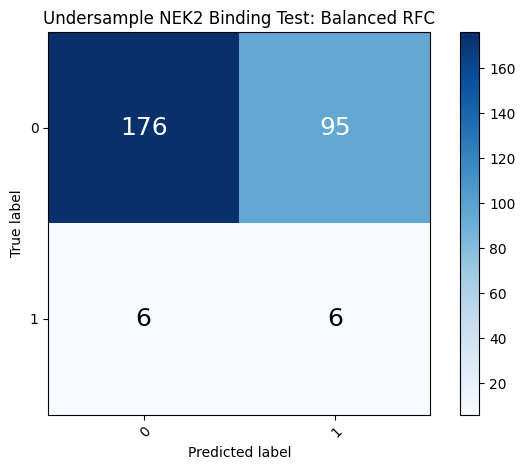

In [13]:
brf_modelUNDER = rf_models(train_x, train_y, test_x, test_y, 'balanced RF', {})
plot_confusion_matrix(train_y, brf_modelUNDER['train_pred'], ['0','1'], title='Undersample NEK2 Binding Train: Balanced RFC')
plot_confusion_matrix(test_y, brf_modelUNDER['test_pred'], ['0','1'], title='Undersample NEK2 Binding Test: Balanced RFC')

TRAIN: accuracy: 0.811, precision: 0.726, recall: 1.000,  specificity: 0.622
TEST: accuracy: 0.629, precision: 0.073, recall: 0.667, specificity: 0.627


<Figure size 600x400 with 0 Axes>

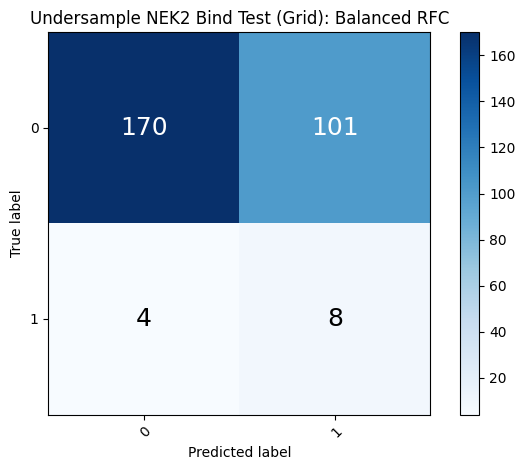

In [14]:
save_file3 = 'atom_nek2bindUNDER_BRFC_best.pkl'
# brfc_bestUNDER = find_best_models(train_x, train_y, test_x, test_y, 'balanced RF', {}, param_grid,2)

# with open(save_file3, 'wb') as f:
#     pickle.dump(brfc_bestUNDER['best_model'], f)
with open('../saved_models/'+save_file3, 'rb') as f: 
    brfc_bestUNDER = pickle.load(f) 
gridresults3 = rf_results2(brfc_bestUNDER, train_x, train_y, test_x, test_y)
plot_confusion_matrix(test_y, gridresults3['test_pred'], ['0','1'], title='Undersample NEK2 Bind Test (Grid): Balanced RFC')


# Try BRFC with balanced class weight & bootstrap

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:576: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:588: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: accuracy: 1.000, precision: 1.000, recall: 1.000, specificity: 1.000
TEST: accuracy: 0.728, precision: 0.078, recall: 0.500, specificity: 0.738


<Figure size 600x400 with 0 Axes>

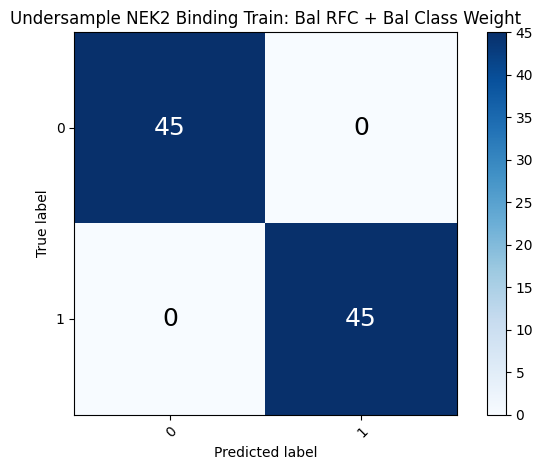

<Figure size 600x400 with 0 Axes>

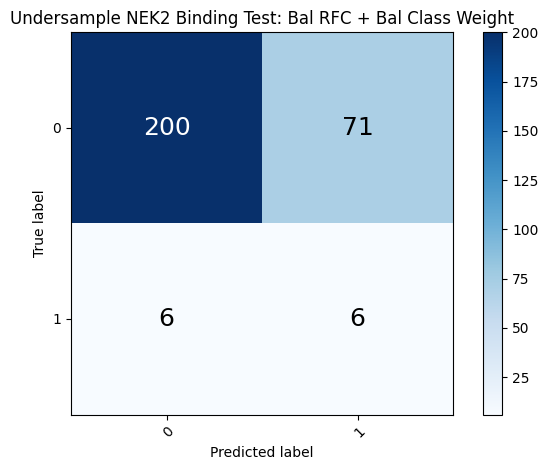

In [15]:
brf_modelCWB_UNDER = rf_models(train_x, train_y, test_x, test_y, 'balanced RF', {'class_weight':'balanced', 'bootstrap':True})
plot_confusion_matrix(train_y, brf_modelCWB_UNDER['train_pred'], ['0','1'], title='Undersample NEK2 Binding Train: Bal RFC + Bal Class Weight')
plot_confusion_matrix(test_y, brf_modelCWB_UNDER['test_pred'], ['0','1'], title='Undersample NEK2 Binding Test: Bal RFC + Bal Class Weight')

TRAIN: accuracy: 0.756, precision: 0.672, recall: 1.000,  specificity: 0.511
TEST: accuracy: 0.640, precision: 0.098, recall: 0.917, specificity: 0.627


<Figure size 600x400 with 0 Axes>

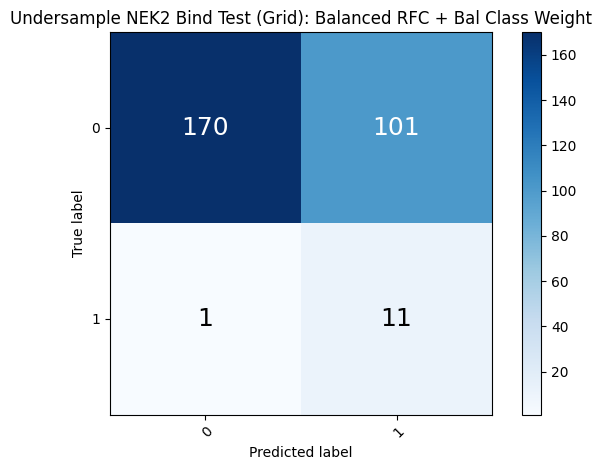

In [16]:
save_file4 = 'atom_nek2bindUNDER_BRFC_BCW_best.pkl'
# brfc_BCW_UNDER_best = find_best_models(train_x, train_y, test_x, test_y, 'balanced RF', {'class_weight':'balanced', 'bootstrap':True}, param_grid, 2)
# with open(save_file3, 'wb') as f:
#         pickle.dump(brfc_BCW_UNDER_best['best_model'], f)
with open('../saved_models/'+save_file4, 'rb') as f: 
    brfc_BCW_UNDER_best = pickle.load(f) 
gridresults4 = rf_results2(brfc_BCW_UNDER_best, train_x, train_y, test_x, test_y)
plot_confusion_matrix(test_y, gridresults4['test_pred'], ['0','1'], title='Undersample NEK2 Bind Test (Grid): Balanced RFC + Bal Class Weight')



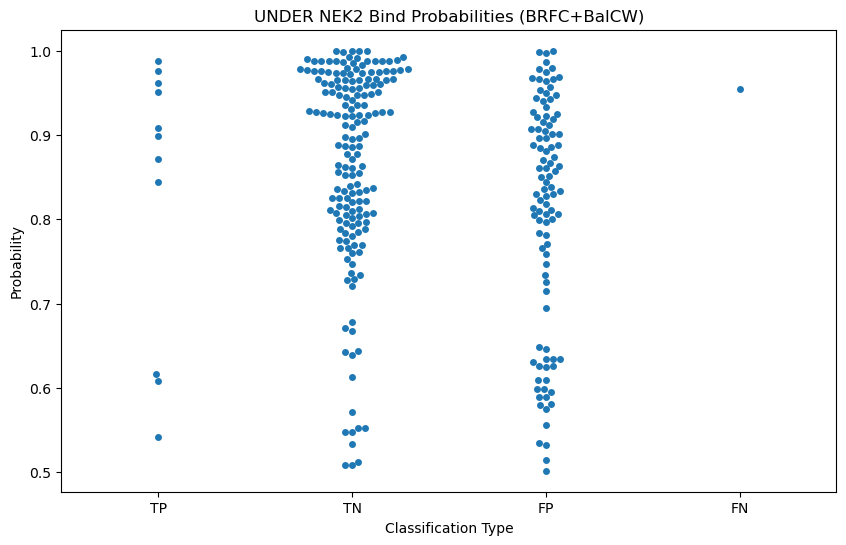

In [20]:
swarm_prob(brfc_BCW_UNDER_best, test_x, test_y, 'UNDER NEK2 Bind Probabilities (BRFC+BalCW)')

In [17]:
temp_nek2bind_MOE_UNDER = {'default_RF':rf_basic100estUNDER['model'], 'rf_bcw':brf_model_BCW_UNDER['model'],
                              'BRFC':brf_modelUNDER['model'], 'BRFC_bcw':brf_modelCWB_UNDER['model']}

# with open('temp_nek2bind_originalUNDERmodels.pkl', 'wb') as f:
#     pickle.dump(temp_nek2bind_MOE_UNDER, f)

NameError: name 'brf_model_BCW_UNDER' is not defined

In [19]:
nek2bind_UNDERmodels = {'default_RF':rf_basicbestUNDER, 'rf_bcw':rf_basicBCWbestUNDER,
                              'BRFC': brfc_bestUNDER, 'BRFC_bcw':brfc_BCW_UNDER_best}

with open('nek2bind_UNDERmodels.pkl', 'wb') as f:
    pickle.dump(nek2bind_UNDERmodels, f)


In [20]:
nek2bind_UNDERmodels

{'default_RF': RandomForestClassifier(bootstrap=False, max_depth=20, max_features=None,
                        min_samples_leaf=2, min_samples_split=4),
 'rf_bcw': RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=100,
                        max_features=None, min_samples_leaf=2,
                        min_samples_split=4),
 'BRFC': BalancedRandomForestClassifier(bootstrap=False, criterion='entropy',
                                max_depth=220, max_features=None,
                                min_samples_leaf=5, min_samples_split=4),
 'BRFC_bcw': BalancedRandomForestClassifier(bootstrap=False, max_depth=20, max_features=None,
                                min_samples_leaf=2, min_samples_split=4,
                                n_estimators=2000)}

In [21]:
grid_models = [rf_basicbestUNDER, rf_basicBCWbestUNDER,brfc_bestUNDER,brfc_BCW_UNDER_best]
model_dictionaries = []
for i, model in enumerate(grid_models): 
    train_results = save_rf_results(model, train_x, train_y)
    test_results  = save_rf_results(model, test_x, test_y) 
    model_dict = {'model':model, 'train_results':train_results, 'test_results':test_results}
    model_dictionaries.append(model_dict) 

with open('nek2_bind_UNDER_results.pkl', 'wb') as f:
    pickle.dump(model_dictionaries, f)